## sprint ディープラーニングフレームワーク２

In [1]:
from keras import backend as K
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import tensorflow as tf
from sklearn.preprocessing import OneHotEncoder
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import torch.optim as optim
from torch.autograd import Variable

/Users/tominagashuuji/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
#pytorchをインポート
from __future__ import print_function
import torch
x = torch.rand(5, 3)
print(x)

tensor([[0.7786, 0.5922, 0.7409],
        [0.8320, 0.4117, 0.8428],
        [0.1961, 0.1453, 0.9069],
        [0.4553, 0.5752, 0.3921],
        [0.2258, 0.4074, 0.7267]])


### 【問題1】公式Exampleを分担して実行
やり方：リンクをクリック→GitHubのREADMEのリンクに飛ぶ
→左側から好きな物を選ぶ（例：初級→KerasによるMLの基本→基本的な画像分類）
→コードを全部コピーして最後まで流す→結果を学習共有時に共有

映画レビューのテキスト分類{こちらを発表} https://www.tensorflow.org/tutorials/keras/basic_text_classification

ファッションMNIST https://www.tensorflow.org/tutorials/keras/basic_classification

### 【問題2】Iris（2値分類）をKerasで学習
TensorFLowやGoogle AI ResearchのGitHubリポジトリには、定番のモデルから最新のモデルまで多様なコードが公開されています。これらから興味あるものを選び実行してください。


なお、これらのコードは初学者向けではないため、巨大なデータセットのダウンロードが必要な場合など、実行が簡単ではないこともあります。そういった場合は、コードリーディングを行ってください。


https://github.com/tensorflow/models/tree/master/research

https://github.com/google-research/google-research


更新日が古いものはPythonやTensorFlowのバージョンが古く、扱いずらい場合があります。新しいものから見ることを推奨します。

### 3.異なるフレームワークへの書き換え

「ディープラーニングフレームワーク1」で作成した4種類のデータセットを扱うTensorFLowのコードを異なるフレームワークに変更していきます。

- Iris（Iris-versicolorとIris-virginicaのみの2値分類）
- Iris（3種類全ての目的変数を使用して多値分類）
- House Prices
- MNIST

#### Kerasへの書き換え
KerasはTensorFLowに含まれるtf.kerasモジュールを使用してください。


KerasにはSequentialモデルかFunctional APIかなど書き方に種類がありますが、これは指定しません。

### 【問題3】Iris（2値分類）をKerasで学習
TensorFlowによるIrisデータセットに対する2値分類をKerasに書き換えてください。

In [6]:
# ANDゲートの学習データを用意

# データセットの読み込み
dataset_path ="Iris.csv"
df = pd.read_csv(dataset_path)
# データフレームから条件抽出
df = df[(df["Species"] == "Iris-versicolor")|(df["Species"] == "Iris-virginica")]
y = df["Species"]
X = df.loc[:, ["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm"]]
y = np.array(y)
X = np.array(X)
# ラベルを数値に変換
y[y=='Iris-versicolor'] = 0
y[y=='Iris-virginica'] = 1
y = y.astype(np.int)[:, np.newaxis]

# trainとtestに分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

model = tf.keras.Sequential([tf.keras.layers.Dense(1, activation = tf.nn.sigmoid, input_shape=(4,))])
model.summary()

model.compile(loss='binary_crossentropy',
              optimizer=tf.train.AdamOptimizer(learning_rate=0.01),
              metrics=['accuracy'])

history = model.fit(X_train, y_train,
                    batch_size=1,
                    epochs=150,
                    verbose=1)
y_pred_proba = model.predict(X_test)[:, 0]

# 確率を0, 1に変換
y_pred = np.where(y_pred_proba >0.5, 1, 0)

print("y_pred_proba", y_pred_proba)
print("y_pred", y_pred)
print("y_test", y_test)

score = model.evaluate(X_train, y_train, verbose=0)
print('Train loss:', score[0])
print('Train accuracy:', score[1])

W0310 13:17:12.428389 140735937377216 deprecation.py:506] From /Users/tominagashuuji/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W0310 13:17:12.540295 140735937377216 deprecation.py:323] From /Users/tominagashuuji/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/tensorflow/python/ops/nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 5         
Total params: 5
Trainable params: 5
Non-trainable params: 0
_________________________________________________________________
Epoch 1/150
80/80 [==============================] - 0s 2ms/sample - loss: 0.7360 - acc: 0.5125
Epoch 2/150
80/80 [==============================] - 0s 1ms/sample - loss: 0.7100 - acc: 0.4375
Epoch 3/150
80/80 [==============================] - 0s 1ms/sample - loss: 0.6936 - acc: 0.5125
Epoch 4/150
80/80 [==============================] - 0s 1ms/sample - loss: 0.6544 - acc: 0.6250
Epoch 5/150
80/80 [==============================] - 0s 1ms/sample - loss: 0.6453 - acc: 0.6375
Epoch 6/150
80/80 [==============================] - 0s 1ms/sample - loss: 0.6210 - acc: 0.6375
Epoch 7/150
80/80 [==============================] - 0s 1ms/sample - loss: 0.618

### 【問題4】Iris（多値分類）をKerasで学習
TensorFlowによるIrisデータセットに対する3値分類をKerasに書き換えてください。

In [7]:
#セッションクリア
K.clear_session()

# データセットの読み込み
dataset_path ="../../dic_ml_ans/Iris.csv"
df = pd.read_csv(dataset_path)
# データフレームから条件抽出
#df = df[(df["Species"] == "Iris-versicolor")|(df["Species"] == "Iris-virginica")]
y = df["Species"]
X = df.loc[:, ["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm"]]
y = np.array(y)
X = np.array(X)
# ラベルを数値に変換
y[y=='Iris-versicolor'] = 0
y[y=='Iris-virginica'] = 1
y[y=='Iris-setosa'] = 2
y = y.astype(np.int)#[:, np.newaxis]
#print(y.shape)

# trainとtestに分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
# # さらにtrainとvalに分割
# X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=0)
# print(X_test.shape)

# yをone-hot表現に変換

enc = OneHotEncoder(handle_unknown='ignore', sparse=False)
y_train_one_hot = enc.fit_transform(y_train[:, np.newaxis])
y_test_one_hot = enc.transform(y_test[:, np.newaxis])
#y_val_one_hot = enc.transform(y_val[:, np.newaxis])
#print(y_train_one_hot.shape)

# Functional API 4層のニューラルネットワーク
input_data = tf.keras.layers.Input(shape=(4,))
X = tf.keras.layers.Dense(10, activation=tf.nn.relu)(input_data)
X = tf.keras.layers.Dense(10, activation=tf.nn.relu)(X)
X = tf.keras.layers.Dense(10, activation=tf.nn.relu)(X)
output = tf.keras.layers.Dense(3, activation=tf.nn.softmax)(X)
model = tf.keras.Model(inputs=input_data, outputs=output)

model.summary()
model.compile(loss='categorical_crossentropy',
              optimizer=tf.train.AdamOptimizer(learning_rate=0.01),
              metrics=['accuracy']) #多値分類なのでカテゴリカルクロスエントロピー
history = model.fit(X_train, y_train_one_hot,
                    batch_size=1,
                    epochs=20,
                    verbose=1)
y_pred_proba = model.predict(X_test)#[:, 0]

# 最大値のインデックスで推定値を求める
y_pred = np.argmax(y_pred_proba,axis=1)

print("y_pred_proba", y_pred_proba)
print("y_pred", y_pred)
print("y_test", y_test)

score = model.evaluate(X_test, y_test_one_hot, verbose=0)
print('Train loss:', score[0])
print('Train accuracy:', score[1])

W0310 13:17:48.371927 140735937377216 deprecation_wrapper.py:119] From /Users/tominagashuuji/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:107: The name tf.reset_default_graph is deprecated. Please use tf.compat.v1.reset_default_graph instead.

W0310 13:17:48.373934 140735937377216 deprecation_wrapper.py:119] From /Users/tominagashuuji/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:111: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W0310 13:17:48.381123 140735937377216 deprecation_wrapper.py:119] From /Users/tominagashuuji/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:66: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.



Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 4)]               0         
_________________________________________________________________
dense (Dense)                (None, 10)                50        
_________________________________________________________________
dense_1 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_2 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 33        
Total params: 303
Trainable params: 303
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
120/120 [==============================] - 0s 2ms/sample - loss: 0.9750 - acc: 0.5333
Epoch 2/20
120/120 [============

### 【問題5】House PricesをKerasで学習
TensorFlowによるHouse Pricesデータセットに対する回帰をKerasに書き換えてください。

In [12]:
#ラッパーとしてのkeras Sequentialモデルは以下のように書けます。ロジスティック回帰の例です。

K.clear_session()

#データの読み込み
Ames = pd.read_csv("../../dic_ml_ans/train.csv")
Ames.head(4)

# GrLivAreaとYearBuiltと目的変数SalePriceを抜き出す
Ames = Ames.loc[:, ["GrLivArea", "YearBuilt", "SalePrice"]]
Ames.head()

# データフレームから条件抽出
X = Ames.loc[:, ["GrLivArea", "YearBuilt"]]
y = Ames["SalePrice"]
y = np.array(y)[:, np.newaxis]
X = np.array(X)

# trainとtestに分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
# さらにtrainとvalに分割
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=0)

print("X_test{}".format(X_test.shape))
print("X_train{}".format(X_train.shape))
print("y_train{}".format(y_train.shape))
print("X_val{}".format(X_train.shape))
print("y_val{}".format(y_val.shape))

# 特徴量データを正規化する
mean_train = X_train.mean(axis=0)
std_train = X_train.std(axis=0)
X_train = (X_train - mean_train) / std_train
mean_test = X_test.mean(axis=0)
std_test = X_test.std(axis=0)
X_test = (X_test - mean_test) / std_test
mean_val = X_val.mean(axis=0)
std_val = X_val.std(axis=0)
X_val = (X_val - mean_val) / std_val

y_test = np.log(y_test)
y_train = np.log(y_train)
y_val = np.log(y_val)


input_data = tf.keras.layers.Input(shape=(2,)) # 入力層
output = tf.keras.layers.Dense(1, activation=tf.nn.sigmoid)(input_data) # 出力層

model = tf.keras.Model(inputs=input_data, outputs=output)

model = Sequential()
model.add(Dense(1, input_shape=(2,)))
#model.add(Activation('sigmoid'))#不要？

model.summary()

model.compile(loss='mean_squared_error',
              optimizer=Adam(lr=0.01),
              metrics=['mse'])
history = model.fit(X_train, y_train,
                    batch_size=1,
                    epochs=10,
                    verbose=1)

y_pred_proba = model.predict(X_test)[:, 0]


print("y_pred_proba：推定値\n", y_pred_proba[:20])
print("y_test：正解値\n", y_test[:20])

score = model.evaluate(X_train, y_train, verbose=0)
print('Train loss:', score[0])
print('Train mse:', score[1])

W0310 13:20:21.333909 140735937377216 deprecation_wrapper.py:119] From /Users/tominagashuuji/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:541: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0310 13:20:21.336937 140735937377216 deprecation_wrapper.py:119] From /Users/tominagashuuji/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:4432: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0310 13:20:21.384109 140735937377216 deprecation_wrapper.py:119] From /Users/tominagashuuji/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/keras/optimizers.py:793: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.



X_test(292, 2)
X_train(934, 2)
y_train(934, 1)
X_val(934, 2)
y_val(234, 1)
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1)                 3         
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
934/934 [==============================] - 1s 1ms/step - loss: 71.0499 - mean_squared_error: 71.0499
Epoch 2/10
934/934 [==============================] - 1s 781us/step - loss: 7.4344 - mean_squared_error: 7.4344
Epoch 3/10
934/934 [==============================] - 1s 755us/step - loss: 0.2461 - mean_squared_error: 0.2461
Epoch 4/10
934/934 [==============================] - 1s 759us/step - loss: 0.0483 - mean_squared_error: 0.0483
Epoch 5/10
934/934 [==============================] - 1s 881us/step - loss: 0.0479 - mean_squared_error: 0.0479
Epoch 6/10
934/934 

### 【問題6】MNISTをKerasで学習
TensorFlowによるMNISTデータセットによる画像の多値分類をKerasに書き換えてください。

##### 【問題3】Iris（多値分類）をKerasで学習 →PyTorchに書き換え
自力で書くのは時間がかかりそうだったので、下記のサイトを写経して、何をしているか読み解きをしてコメントをつけて学習しました m( )m

http://aidiary.hatenablog.com/entry/20180225/1519520981

In [13]:
"""
KerasのFunctional API 4層のニューラルネットワークで実装したニューラルネットワークを使いMNISTを多値分類する
"""
K.clear_session()
# データセットの読み込み
from keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# データセットを確認
# print(X_train.shape) # (60000, 28, 28)
# print(X_test.shape) # (10000, 28, 28)
# print(X_train[0].dtype) # uint8
#print(X_train[0])

#平滑化
X_train = X_train.reshape(-1, 784)
X_test = X_test.reshape(-1, 784)
#２２５で割る
X_train = X_train.astype(np.float)
X_test = X_test.astype(np.float)
X_train /= 255 # 全て２５５で割っている
X_test /= 255

#trainをさらに分割
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2)
# print(X_train.shape) # (48000, 784)
# print(X_val.shape) # (12000, 784)

# yをone-hot表現に変換
enc = OneHotEncoder(handle_unknown='ignore', sparse=False)
y_train_one_hot = enc.fit_transform(y_train[:, np.newaxis])
y_test_one_hot = enc.transform(y_test[:, np.newaxis])
y_val_one_hot = enc.transform(y_val[:, np.newaxis])
# print(y_train.shape) # (60000,)
# print(y_train_one_hot.shape) # (60000, 10)
# print(y_test_one_hot.dtype) # float64
# print(y_val_one_hot.dtype) # float64
    
# Functional API 4層のニューラルネットワーク
input_data = tf.keras.layers.Input(shape=(784,))
X = tf.keras.layers.Dense(10, activation=tf.nn.relu)(input_data)
X = tf.keras.layers.Dense(10, activation=tf.nn.relu)(X)
X = tf.keras.layers.Dense(10, activation=tf.nn.relu)(X)
output = tf.keras.layers.Dense(10, activation=tf.nn.softmax)(X)
model = tf.keras.Model(inputs=input_data, outputs=output)

model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer=tf.train.AdamOptimizer(learning_rate=0.01),
              metrics=['accuracy'])
history = model.fit(X_train, y_train_one_hot,
                    batch_size=20,
                    epochs=20,
                    verbose=1)
y_pred_proba = model.predict(X_test)

#最大値のインデックスを取る
y_pred = np.argmax(y_pred_proba, axis=1)

print("y_pred_proba\n", y_pred_proba)
print("y_pred(予測値)", y_pred[:20],sep="")
print("y_test（正解）", y_test[:20])

score = model.evaluate(X_train, y_train_one_hot, verbose=0)
print('Train loss:', score[0])
print('Train accuracy:', score[1])

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense (Dense)                (None, 10)                7850      
_________________________________________________________________
dense_1 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_2 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_3 (Dense)              (None, 10)                110       
Total params: 8,180
Trainable params: 8,180
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
48000/48000 [==============================] - 4s 76us/sample - loss: 0.4888 - acc: 0.8501
Epoch 2/20
48000/48000 

In [14]:
# データセットの読み込み（下のやり方より簡単）
iris = load_iris()
X = iris.data #.dataでデータ本体を取得
y = iris.target # .targetでクラスラベルが取得できる
print(X.shape)  # (150, 4)
print(y.shape)  # (150, )

# trainとtestに分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=5)

print(X_train[:10])
print(y_train[:10])

# データの標準化
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
print(np.mean(X_train, axis=0))  # [ -2.47274423e-15   3.85247390e-16  -4.26603197e-16  -7.66053887e-17]
print(np.std(X_train, axis=0))   # [ 1.  1.  1.  1.]

(150, 4)
(150,)
[[6.3 2.5 5.  1.9]
 [5.  3.2 1.2 0.2]
 [4.6 3.4 1.4 0.3]
 [5.7 4.4 1.5 0.4]
 [5.2 3.4 1.4 0.2]
 [6.2 2.9 4.3 1.3]
 [6.3 3.3 4.7 1.6]
 [5.5 2.4 3.7 1. ]
 [5.1 2.5 3.  1.1]
 [5.9 3.  5.1 1.8]]
[2 0 0 0 0 1 1 1 1 2]
[-2.47274423e-15  3.85247390e-16 -4.26603197e-16 -7.66053887e-17]
[1. 1. 1. 1.]


In [16]:
# hyperparameters
input_size = 4
num_classes = 3 
num_epochs = 10000
learning_rate = 0.01

#ロジスティック回帰クラス
class LogisticRegression(nn.Module):# nn.Module:すべてのニューラルネットワークモジュールの基本クラス

    def __init__(self, input_size, num_classes):
        super(LogisticRegression, self).__init__()#super関数
        self.linear = nn.Linear(input_size, num_classes)#nn.Liner入力に重みとバイアスによる線形変換を行う関数
    
    def forward(self, x):
        out = self.linear(x)
        return out

# modelの定義
model = LogisticRegression(input_size, num_classes)

# loss関数の定義
criterion = nn.CrossEntropyLoss()#この中にsoftmaxが含まれている

# 最適化手法のパラメータ設定
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

# lossを求める 
def train(X_train, y_train):
    inputs = torch.from_numpy(X_train).float()#numpyからTensorを生成。データタイプ指定
    targets = torch.from_numpy(y_train).long()
        
    # 勾配の初期化
    optimizer.zero_grad()
    # 順伝播
    outputs = model(inputs)
    # ロスの計算
    loss = criterion(outputs, targets)
    loss.backward()# 勾配の計算
    
    # パラメータ(重み・バイアス）の更新
    optimizer.step()

    return loss.item()#.item()はtapleの値のみを取り出すっぽい

#検証
def valid(X_test, y_test):
    inputs = torch.from_numpy(X_test).float()
    targets = torch.from_numpy(y_test).long()

    outputs = model(inputs)
    val_loss = criterion(outputs, targets)#誤差
    
    # 精度を求める
    _, predicted = torch.max(outputs, 1)#最大値のインデックス
    correct = (predicted == targets).sum().item()
    val_acc = float(correct) / targets.size(0)#正解数をサンプル数で割って正解率を出す

    return val_loss.item(), val_acc

loss_list = []
val_loss_list = []
val_acc_list = []
for epoch in range(num_epochs):
    perm = np.arange(X_train.shape[0])
    np.random.shuffle(perm)#trainデータをepocごとにシャッフルしている。この人独自の手法？
    X_train = X_train[perm]
    y_train = y_train[perm]
    
    loss = train(X_train, y_train)
    val_loss, val_acc = valid(X_test, y_test)
    
    if epoch % 1000 == 0:#epoc1000回ごとにプリントする
        print('epoch %d, loss: %.4f val_loss: %.4f val_acc: %.4f'
              % (epoch, loss, val_loss, val_acc))
    
    # logging
    loss_list.append(loss)
    val_loss_list.append(val_loss)
    val_acc_list.append(val_acc)

epoch 0, loss: 1.2592 val_loss: 1.2664 val_acc: 0.2200
epoch 1000, loss: 0.3125 val_loss: 0.3263 val_acc: 0.9200
epoch 2000, loss: 0.2467 val_loss: 0.2647 val_acc: 0.9400
epoch 3000, loss: 0.2087 val_loss: 0.2312 val_acc: 0.9400
epoch 4000, loss: 0.1828 val_loss: 0.2086 val_acc: 0.9400
epoch 5000, loss: 0.1639 val_loss: 0.1920 val_acc: 0.9400
epoch 6000, loss: 0.1494 val_loss: 0.1792 val_acc: 0.9400
epoch 7000, loss: 0.1380 val_loss: 0.1690 val_acc: 0.9400
epoch 8000, loss: 0.1288 val_loss: 0.1608 val_acc: 0.9400
epoch 9000, loss: 0.1211 val_loss: 0.1539 val_acc: 0.9400


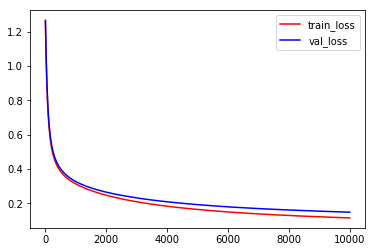

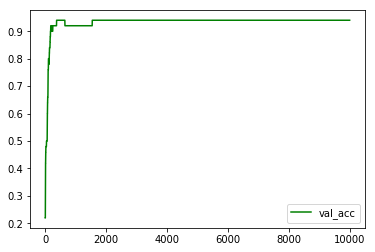

In [17]:
# plot learning curve　学習曲線とアキュラシー
plt.figure()
plt.plot(range(num_epochs), loss_list, 'r-', label='train_loss')
plt.plot(range(num_epochs), val_loss_list, 'b-', label='val_loss')
plt.legend()

plt.figure()
plt.plot(range(num_epochs), val_acc_list, 'g-', label='val_acc')
plt.legend()

### 【問題7】（アドバンス課題）PyTorchへの書き換え
4種類の問題をPyTorchに書き換えてください。

### 【問題8】（アドバンス課題）フレームワークの比較
それぞれのフレームワークにはどのような違いがあるかをまとめてください。

《視点例》  
計算速度  
コードの行数・可読性  
用意されている機能  

それぞれのフレームワークにはどのような違いがあるかをまとめてください。  

TensorFlow: ・計算速度　＝　BAD：TensorFlowだと、行列演算において最先端のディープラーニングツールの4倍の時間が掛かる BAD：計算グラフは単なるPythonなため、遅い。  

・コードの行数・可読性　＝　BAD:計算グラフの定義と、実行・学習を行うセッションが別々でややわかりにくい BAD：書き方に個人差が出やすい ・用意されている機能　＝　GOOD：TensorBoardを使用して視覚化することができる。  

GOOD：ニューラルネットに特化したライブラリが豊富 Pytorch ・計算速度　＝　GOOD：３つの中で最速 ・コードの行数・可読性　＝　GOOD:pythonを書くようにかける。  

直感的で可読性も良い ・用意されている機能　＝　GOOD：簡単に組み合わせることのできるモジュールのピースが多くある。  

GOOD:前もってトレーニングされたモデルが多くある。 BAD：日本語の文献がまだ少ない Keras ・計算速度　＝　BAD：TensorFlowよりわずかに速いくらい、Pytorchにかなり劣る ・コードの行数・可読性　＝　GOOD：直感的なAPI。  

行数が少なく初心者でも書きやすく理解しやすい ・用意されている機能　＝　GOOD：フレームワークが急速な成長を続けている。